In [7]:
import yaml
import pandas as pd
from langchain_openai import ChatOpenAI
from project_info import ProjectInfo
from tqdm import tqdm
from agentic_interface import AgenticInterface

In [2]:
ENVIRONMENT = yaml.load(
    open("../project.yaml", "r"), Loader=yaml.FullLoader
)
IKIGAI_API_KEY = ENVIRONMENT["ikigai_api_key"]
OPENAI_API_KEY = ENVIRONMENT["openai_api_key"]

# Setup the llm 
llm = ChatOpenAI(api_key=OPENAI_API_KEY, temperature=0)
json_llm = ChatOpenAI(api_key=OPENAI_API_KEY, temperature=0, model_kwargs={"response_format": {"type": "json_object"}})

In [3]:
# Get all of the project info
user_email = "eliza@ikigailabs.io"
target_project = "Agentic Interface Test"
mapping_df = mapping = pd.read_csv("./uid_to_name.csv")
project_info = ProjectInfo(
    user_email=user_email,
    api_key=IKIGAI_API_KEY,
    openai_api_key=OPENAI_API_KEY,
    target_project=target_project,
    mapping_df=mapping_df,
    )

In [4]:
# For metrics, turn of the verbosity which is default on
VERBOSE = False

# Metrics for Metric Lookup

### Type: 100 of the same query

In [5]:
# Define the user query for the metric lookup metrics
user_query = "What are the average sales in January?"

In [8]:
values = []
responses = []
for i in tqdm(range(100)):
    agentic_interface = AgenticInterface(llm=llm, json_llm=json_llm, project_info=project_info, verbose=VERBOSE)
    response = agentic_interface.get_response(user_query)
    # Then ask the llm to extract 1 number for easy math
    answer = llm.invoke(f"Take this response: {response} and return ONLY the numerical answer the response contains").content
    responses.append(response)
    values.append(answer)
metrics_df = pd.DataFrame({
    "Value": values,
    "Response": responses
})
metrics_df.to_csv("./results_for_paper/metric_lookup_100_same.csv", index=False)

100%|██████████| 100/100 [23:56<00:00, 14.36s/it]


### Type: 10 different wordings of the same query

In [9]:
# Used chat gpt to generate 10 ways of saying the same query
user_queries = [
    "Can you tell me the mean sales for January?",
    "What was the typical sales figure for January?",
    "How much did we sell on average in January?",
    "What is the average revenue for January?",
    "What were the January sales like on average?",
    "Can you give me the average January sales numbers?",
    "What is the usual sales performance for January?",
    "How did sales trend on average in January?",
    "What is the average monthly sales total for January?",
    "Could you provide the average January sales data?"
]

In [10]:
values = []
responses = []
for i in tqdm(range(100)):
    agentic_interface = AgenticInterface(llm=llm, json_llm=json_llm, project_info=project_info, verbose=VERBOSE)
    # Do 10 trials of each
    response = agentic_interface.get_response(user_queries[i // 10])
    # Then ask the llm to extract 1 number for easy math
    answer = llm.invoke(f"Take this response: {response} and return ONLY the numerical answer the response contains").content
    responses.append(response)
    values.append(answer)
metrics_df = pd.DataFrame({
    "Value": values,
    "Response": responses
})
metrics_df.to_csv("./results_for_paper/metric_lookup_10_dif_wordings_of_same_query.csv", index=False)

 59%|█████▉    | 59/100 [13:48<08:21, 12.23s/it]

{'Average Quantity in January': 113.0, 'Average Revenue in January': 5049.0, 'Dataframe Shape': (5, 9)}


 84%|████████▍ | 84/100 [20:11<04:07, 15.49s/it]<string>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 88%|████████▊ | 88/100 [21:02<02:40, 13.35s/it]<string>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
100%|██████████| 100/100 [23:57<00:00, 14.38s/it]


### Type: 10 different queries

In [11]:
# Used chat gpt to generate 10 ways of saying the same query
user_queries = [
    "What are the average sales in January?",
    "What is the total revenue for Q1?",
    "How many units were sold in January?",
    "What is the highest daily sales in January?",
    "Can you show me the median transaction value in January?",
    "What is the average order value in January?",
    "How much did we earn from FTH in January",
    "What is the year-over-year growth for January?",
    "What is the lowest weekly revenue in January?",
    "Can you tell me the sum of all returns in January?"
]

In [12]:
values = []
responses = []
for i in tqdm(range(100)):
    agentic_interface = AgenticInterface(llm=llm, json_llm=json_llm, project_info=project_info, verbose=VERBOSE)
    # Do 10 trials of each
    response = agentic_interface.get_response(user_queries[i // 10])
    # Then ask the llm to extract 1 number for easy math
    answer = llm.invoke(f"Take this response: {response} and return ONLY the numerical answer the response contains").content
    responses.append(response)
    values.append(answer)
metrics_df = pd.DataFrame({
    "Value": values,
    "Response": responses
})
metrics_df.to_csv("./results_for_paper/metric_lookup_10_dif_queries.csv", index=False)

 15%|█▌        | 15/100 [04:08<24:03, 16.98s/it]<string>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 18%|█▊        | 18/100 [05:01<23:25, 17.14s/it]<string>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 40%|████      | 40/100 [10:31<13:29, 13.48s/it]<string>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

# Metrics for Comparison

### Type: 100 of the same query

In [13]:
# Define the user query for the comparison metrics
user_query = "What is the difference between the sales in the South in January and the sales in the Midwest in January?"

In [14]:
values = []
responses = []
for i in tqdm(range(100)):
    agentic_interface = AgenticInterface(llm=llm, json_llm=json_llm, project_info=project_info, verbose=VERBOSE)
    response = agentic_interface.get_response(user_query)
    # Then ask the llm to extract 1 number for easy math
    answer = llm.invoke(f"Take this response: {response} and return ONLY the numerical answer the response contains").content
    responses.append(response)
    values.append(answer)
metrics_df = pd.DataFrame({
    "Value": values,
    "Response": responses
})
metrics_df.to_csv("./results_for_paper/comparison_100_same.csv", index=False)

  1%|          | 1/100 [00:18<31:01, 18.80s/it]<string>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  3%|▎         | 3/100 [00:45<23:41, 14.66s/it]<string>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<st

### Type: 10 different wordings of the same query

In [15]:
# Used chat gpt to generate 10 ways of saying the same query
user_queries = [
    "How do January sales in the South compare to those in the Midwest?",
    "What is the difference in January sales between the South and Midwest regions?",
    "Can you show me the sales gap between the South and Midwest for January?",
    "How much more (or less) did the South sell compared to the Midwest in January?",
    "Compare the January sales figures for the South and the Midwest.",
    "What is the delta between South and Midwest sales in January?",
    "By how much did January sales differ between the South and the Midwest?",
    "What is the sales variation between the South and Midwest regions for January?",
    "How did the South and Midwest perform in sales during January?",
    "What was the difference in sales numbers between the South and Midwest in January?"
]

In [16]:
values = []
responses = []
for i in tqdm(range(100)):
    agentic_interface = AgenticInterface(llm=llm, json_llm=json_llm, project_info=project_info, verbose=VERBOSE)
    # Do 10 trials of each
    response = agentic_interface.get_response(user_queries[i // 10])
    # Then ask the llm to extract 1 number for easy math
    answer = llm.invoke(f"Take this response: {response} and return ONLY the numerical answer the response contains").content
    responses.append(response)
    values.append(answer)
metrics_df = pd.DataFrame({
    "Value": values,
    "Response": responses
})
metrics_df.to_csv("./results_for_paper/comparison_10_dif_wordings_of_same_query.csv", index=False)

  0%|          | 0/100 [00:00<?, ?it/s]<string>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  1%|          | 1/100 [00:14<24:26, 14.81s/it]<string>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  2%|▏     

{'Total January Sales Figures': {'South': 2173.5}, 'Dataframe Shape': (20, 9), 'Filtered Data Shape': (1, 9)}


 71%|███████   | 71/100 [15:45<06:57, 14.40s/it]<string>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
100%|██████████| 100/100 [24:08<00:00, 14.49s/it]


### Type: 10 different queries

In [17]:
user_queries = [
    "What is the difference between January sales in the South and the Midwest?",
    "By how much did the South's January sales exceed those in the Northeast?",
    "What is the ratio of January sales in the Midwest to those in the South?",
    "How many more units were sold in the Northeast than in the Midwest during January?",
    "What is the percentage difference in January sales between the South and Northeast?",
    "How much did January revenue in the South fall short of that in the Midwest?",
    "What is the combined sales total for the South and Midwest in January?",
    "What is the average sales value across the South, Midwest, and Northeast for January?",
    "What is the January sales gap between the highest and lowest performing region among South, Midwest, and Northeast?",
    "By what margin did Midwest sales lead over the South in January?"
]

In [18]:
values = []
responses = []
for i in tqdm(range(100)):
    agentic_interface = AgenticInterface(llm=llm, json_llm=json_llm, project_info=project_info, verbose=VERBOSE)
    # Do 10 trials of each
    response = agentic_interface.get_response(user_queries[i // 10])
    # Then ask the llm to extract 1 number for easy math
    answer = llm.invoke(f"Take this response: {response} and return ONLY the numerical answer the response contains").content
    responses.append(response)
    values.append(answer)
metrics_df = pd.DataFrame({
    "Value": values,
    "Response": responses
})
metrics_df.to_csv("./results_for_paper/comparison_10_dif_queries.csv", index=False)

  8%|▊         | 8/100 [02:24<28:39, 18.70s/it]<string>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 10%|█         | 10/100 [03:01<28:18, 18.88s/it]<string>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 11

{'Filtered_Columns': ['Region', 'Time'], 'Filtered_Values': {'Region': ['South', 'Midwest'], 'Month': 'January'}, 'Combined_Sales_Total': 9315.0}


 64%|██████▍   | 64/100 [17:05<08:42, 14.51s/it]<string>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 69%|██████▉   | 69/100 [18:08<06:38, 12.87s/it]<string>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<

{'Average Sales Value Across South, Midwest, and Northeast for January': 100100.0, 'Month': 'January', 'Regions': ['South', 'Midwest', 'Northeast']}


 72%|███████▏  | 72/100 [18:52<06:32, 14.02s/it]<string>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 76%|███████▌  | 76/100 [19:43<05:10, 12.95s/it]<s

# Use metric files to get graphs for final paper

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the file paths
file_paths = {
    "Metric: 100x same query": "./results_for_paper/metric_lookup_100_same.csv",
    "Metric: 10x10 paraphrases": "./results_for_paper/metric_lookup_10_dif_wordings_of_same_query.csv",
    "Metric: 10x10 different": "./results_for_paper/metric_lookup_10_dif_queries.csv",
    "Comparison: 100x same query": "./results_for_paper/comparison_100_same.csv",
    "Comparison: 10x10 paraphrases": "./results_for_paper/comparison_10_dif_wordings_of_same_query.csv",
    "Comparison: 10x10 different": "./results_for_paper/comparison_10_dif_queries.csv"
}

## For metric lookup

In [38]:
metrics1 = pd.read_csv(file_paths["Metric: 100x same query"])

In [48]:
cleaned_list = ["".join(str(s).strip("$").split(",")[0:2]) for s in metrics1["Value"]]

In [50]:
# MSE = 0, Variance = 0

In [51]:
metrics2 = pd.read_csv(file_paths["Metric: 10x10 paraphrases"])

In [72]:
metrics2_values = [26986.88,
 26986.88,
 26986.88,
 26986.88,
 26986.88,
 26986.88,
 0,
 26986.88,
 119.96,
 119.96,
 26986.88,
 26986.88,
 26986.88,
 26986.88,
 26986.88,
 26986.88,
 26986.88,
 26986.88,
 26986.88,
 26986.88,
 1295528,
 1295528,
 10794750.81,
 26986.88,
 26986.88,
 291458272.00,
 26986.88,
 119.96,
 26986.88,
 26986.88,
 26986.88,
 26986.88,
 26986.88,
 26986.88,
 26986.88,
 26986.88,
 26986.88,
 26986.88,
 26986.88,
 26986.88,
 26986.88,
 26986.88,
 26986.88,
26986.88,
26986.88,
26986.88,
26986.88,
26986.88,
26986.88,
26986.88,
26986.88,
26986.88,
 119.96,
26986.88,
 119.96,
 119.96,
26986.88,
26986.88,
26986.88,
26986.88,
26986.88,
 291458272.00,
 119.96,
 291458272.00,
 119.96,
 291458272.00,
 291458272.00,
26986.88,
26986.88,
26986.88,
26986.88,
26986.88,
26986.88,
26986.88,
26986.88,
26986.88,
26986.88,
26986.88,
26986.88,
26986.88,
24288189.33,
24288189.33,
26986.88,
26986.88,
3365140.62,
4048031.56,
26986.88,
291458272.00,
3365140.62,
 291458272.00,
 119.96,
26986.88,
 119.96,
26986.88,
 119.96,
 119.96,
26986.88,
26986.88,
26986.88,
26986.88]

In [73]:
metrics2_values = np.array(metrics2_values) - 26986.88

In [74]:
normalized_arr = (metrics2_values - metrics2_values.min()) / (metrics2_values.max() - metrics2_values.min())

In [78]:
normalized_arr.mean()

0.07256245920342243

In [79]:
normalized_arr.std()

0.25473965594684533

In [67]:
metrics3 = pd.read_csv(file_paths["Metric: 10x10 different"])

In [82]:
metrics3_values = np.array([26986.88,
26986.88,
26986.88,
26986.88,
26986.88,
26986.88,
26986.88,
26986.88,
26986.88,
26986.88,
824033867.5,
691710257.5,
824033867.5,
824033867.5,
824033867.5,
691710257.5,
824033867.5,
824033867.5,
691710257.5,
824033867.5,
1295528,
1295528,
1295528,
1295528,
1295528,
1295528,
1295528,
1295528,
1295528,
1295528,
12086437.00,
12086437.00,
12086437.00,
12086437.00,
12086437.00,
12086437.00,
12086437.00,
12086437.00,
12086437.00,
12086437.00,
1573.435,
1573.435,
1573.435,
1573.435,
1573.435,
1573.435,
1573.435,
1573.435,
1573.435,
1573.435,
38371.86,
38371.86,
38371.86,
38371.86,
38371.86,
38371.86,
38371.86,
38371.86,
38371.86,
38371.86,
23443290,
23443290,
23443290,
23443290,
23443290,
23443290,
23443290,
23443290,
23443290,
23443290,
0,
0,
0,
0,
0,
122.67,
0,
0,
0,
0,
11553899.50,
11553899.50,
0,
11553899.50,
11553899.50,
0,
0,
0,
0,
11553899.50,
211431217.71,
0,
211431217.71,
0,
211431217.71,
211431217.71,
211431217.71,
211431217.71,
211431217.71,
211431217.71])


In [83]:
# Subtract off correct answers
metrics3_values[0:10] = metrics3_values[0:10] - 26986.88
metrics3_values[10:20] = metrics3_values[10:20] - 824033867.5
metrics3_values[20:30] = metrics3_values[20:30] - 1295528
metrics3_values[30:40] = metrics3_values[30:40] - 12086437.00
metrics3_values[40:50] = metrics3_values[40:50] - 1573.435
metrics3_values[50:60] = metrics3_values[50:60] - 38371.86
metrics3_values[60:70] = metrics3_values[60:70] - 23443290
metrics3_values[70:80] = metrics3_values[70:80]
metrics3_values[80:90] = metrics3_values[80:90] - 11553899.50
metrics3_values[90:100] = metrics3_values[90:100] - 211431217.71

In [93]:
normalized_arr3 = np.zeros_like(metrics3_values, dtype=float)

for i in range(10):
    start = i * 10
    end = start + 10
    chunk = metrics3_values[start:end]
    denom = chunk.max() - chunk.min()

    # Avoid division by zero
    if denom == 0:
        normalized_arr3[start:end] = 0  # or 1, or np.nan — whatever you want
    else:
        normalized_arr3[start:end] = (chunk - chunk.min()) / denom

In [94]:
normalized_arr3

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.])

In [95]:
normalized_arr3.mean()

0.21

In [96]:
normalized_arr3.std()

0.4073082370883261

## For comparison

In [97]:
comparison1 = pd.read_csv(file_paths["Comparison: 100x same query"])

In [102]:
comparison1_values = np.array([
2607611,
282451.5,
2607611,
282451.5,
2607611,
2607611,
2607611,
2607611,
2607611,
2607611,
2607611,
282451.5,
2607611,
2607611,
0,
2607611,
282451.5,
2607611,
282451.5,
2607611,
282451.5,
282451.5,
2607611,
2607611,
2607611,
2607611,
282451.5,
282451.5,
2607611,
2607611,
2607611,
2607611,
2607611,
2607611,
2607611,
2607611,
2607611,
2607611,
2607611,
2607611,
2607611,
2607611,
282451.5,
2607611,
2607611,
0,
282451.5,
0,
2607611,
2607611,
2607611,
2607611,
2607611,
282451.5,
2607611,
2607611,
2607611,
2607611,
2607611,
2607611,
2607611,
282451.5,
2607611,
2607611,
2607611,
2607611,
2607611,
2607611,
2607611,
282451.5,
2607611,
2607611,
2607611,
2607611,
282451.5,
479238.5,
2607611,
2607611,
2607611,
2607611,
282451.5,
2607611,
2607611,
2607611,
2607611,
2607611,
282451.5,
2607611,
2607611,
282451.5,
2607611,
2607611,
2607611,
620913.0,
2607611,
2607611,
479238.5,
2607611,
0,
2607611])

In [103]:
comparison1_values = comparison1_values - 2607611

In [104]:
normalized_arr_comp = (comparison1_values - comparison1_values.min()) / (comparison1_values.max() - comparison1_values.min())

In [105]:
normalized_arr_comp.mean()

0.7755541068050411

In [106]:
normalized_arr_comp.std()

0.3897053494192362

In [107]:
comparison2 = pd.read_csv(file_paths["Comparison: 10x10 paraphrases"])

In [109]:
comparison2_values = np.array([
2607611.00,
58253820.50,
2607611.00,
58253820.50,
58253820.50,
58253820.50,
58253820.50,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
58253820.50,
2607611.00,
58253820.50,
58253820.50,
113900030.0,
2607611.00,
58253820.50,
58253820.50,
58253820.50,
58253820.50,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
4.69,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
58253820.50,
58253820.50,
58253820.50,
58253820.50,
113900030.0,
113900030.0,
113900030.0,
113900030.0,
113900030.0,
113900030.0,
113900030.0,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00,
2607611.00])

In [110]:
comparison2_values = comparison2_values - 2607611.00

In [111]:
normalized_arr_comp2 = (comparison2_values - comparison2_values.min()) / (comparison2_values.max() - comparison2_values.min())

In [112]:
normalized_arr_comp2.mean()

0.17900186792241196

In [113]:
normalized_arr_comp2.std()

0.3003396357974195

In [114]:
comparison3 = pd.read_csv(file_paths["Comparison: 10x10 different"])

In [119]:
comparison3_values = np.array([2607611,
2607611,
2607611,
2607611,
2607611,
2607611,
2607611,
2607611,
2607611,
2607611,
52468169.50,
52468169.50,
52468169.50,
52468169.50,
52468169.50,
52468169.50,
52468169.50,
52468169.50,
52468169.50,
52468169.50,
0.955,
0.955,
0.955,
0.955,
0.955,
0.955,
0.955,
0.955,
0.955,
0.955,
309016,
309016,
309016,
309016,
309016,
309016,
309016,
309016,
309016,
309016,
-47.39,
-47.39,
-47.39,
-47.39,
-47.39,
-47.39,
-47.39,
-47.39,
-47.39,
-47.39,
282451.50,
282451.50,
2607611.00,
2607611.00,
681283261.00,
2607611.00,
2607611.00,
479238.5,
2607611.00,
2607611.00,
113900030.00,
113900030.00,
113900030.00,
113900030.00,
92961810.50,
113900030.00,
113900030.00,
113900030.00,
113900030.00,
20938219.50,
27731.11,
27731.11,
27731.11,
27731.11,
27731.11,
27731.11,
27731.11,
27731.11,
27731.11,
27731.11,
280.0,
236.0,
236.0,
46270.0,
280.0,
280.0,
280.0,
280.0,
280.0,
236.0,
883,
883,
883,
883,
883,
883,
-2.2,
883,
883,
883])

In [121]:
# Subtract off correct answers
comparison3_values[0:10] = comparison3_values[0:10] - 2607611
comparison3_values[10:20] = comparison3_values[10:20] - 52468169.50
comparison3_values[20:30] = comparison3_values[20:30] - 0.955
comparison3_values[30:40] = comparison3_values[30:40] - 309016
comparison3_values[40:50] = comparison3_values[40:50] + 47.39
comparison3_values[50:60] = comparison3_values[50:60] - 2607611.00
comparison3_values[60:70] = comparison3_values[60:70] - 113900030.00
comparison3_values[70:80] = comparison3_values[70:80] - 27731.11
comparison3_values[80:90] = comparison3_values[80:90] - 280.0
comparison3_values[90:100] = comparison3_values[90:100] - 883

In [122]:
normalized_comp_arr3 = np.zeros_like(comparison3_values, dtype=float)

for i in range(10):
    start = i * 10
    end = start + 10
    chunk = comparison3_values[start:end]
    denom = chunk.max() - chunk.min()

    # Avoid division by zero
    if denom == 0:
        normalized_comp_arr3[start:end] = 0  # or 1, or np.nan — whatever you want
    else:
        normalized_comp_arr3[start:end] = (chunk - chunk.min()) / denom

In [123]:
normalized_comp_arr3.mean()

0.1980127518592199

In [124]:
normalized_comp_arr3.std()

0.39597262393976673

## Actual Plot

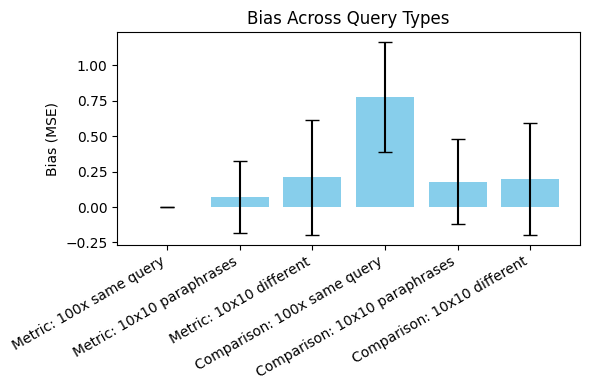

In [131]:
import matplotlib.pyplot as plt
import numpy as np

categories = ['Metric: 100x same query',
              'Metric: 10x10 paraphrases',
              'Metric: 10x10 different',
              'Comparison: 100x same query',
              'Comparison: 10x10 paraphrases',
              'Comparison: 10x10 different']
bias_means = [0, 0.07256245920342243, 0.21, 0.7755541068050411, 0.17900186792241196, 0.1980127518592199]
bias_std = [0, 0.25473965594684533, 0.4073082370883261, 0.3897053494192362, 0.3003396357974195, 0.39597262393976673]

x = np.arange(len(categories))

plt.figure(figsize=(6, 4))
plt.bar(x, bias_means, yerr=bias_std, capsize=5, color='skyblue')
plt.xticks(x, categories, rotation=30, ha='right')
plt.ylabel('Bias (MSE)')
plt.title('Bias Across Query Types')
plt.tight_layout()
plt.show()

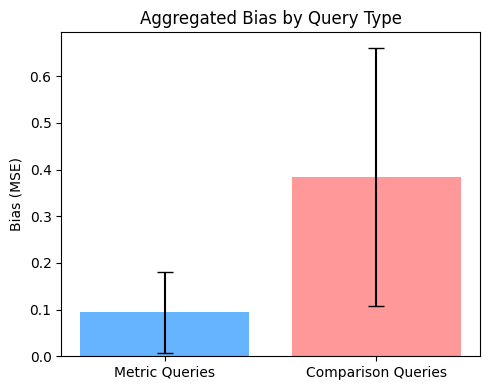

In [132]:
import matplotlib.pyplot as plt
import numpy as np

# Original data
categories = ['Metric: 100x same query',
              'Metric: 10x10 paraphrases',
              'Metric: 10x10 different',
              'Comparison: 100x same query',
              'Comparison: 10x10 paraphrases',
              'Comparison: 10x10 different']
bias_means = [0, 0.07256245920342243, 0.21, 0.7755541068050411, 0.17900186792241196, 0.1980127518592199]
bias_std = [0, 0.25473965594684533, 0.4073082370883261, 0.3897053494192362, 0.3003396357974195, 0.39597262393976673]

# Grouping by 'Metric' and 'Comparison'
metric_means = bias_means[:3]
metric_stds = bias_std[:3]
comparison_means = bias_means[3:]
comparison_stds = bias_std[3:]

# Compute mean and std of each group
aggregated_means = [
    np.mean(metric_means),
    np.mean(comparison_means)
]
aggregated_stds = [
    np.std(metric_means),
    np.std(comparison_means)
]

# Plotting
group_labels = ['Metric Queries', 'Comparison Queries']
x = np.arange(len(group_labels))

plt.figure(figsize=(5, 4))
plt.bar(x, aggregated_means, yerr=aggregated_stds, capsize=6, color=['#66b3ff', '#ff9999'])
plt.xticks(x, group_labels)
plt.ylabel('Bias (MSE)')
plt.title('Aggregated Bias by Query Type')
plt.tight_layout()
plt.show()
